# Get some tweets with tweepy for data analysis.
# You need a free twitter dev account to obtain api access
# Read tweepy docs for auth and initialization
This repository ows the general idea and most of the methods applied here to this github-repository 
by MechLabEngineering:

https://github.com/MechLabEngineering/Tatort-Analyzer-ME

In [28]:
#!pip install tweepy
#!pip install twitter


In [29]:
import tweepy as tp
import twitter
import pandas as pd
import json

#FILL IN YOUR KEYS OBTAINED FROM TWITTER DEV

twitter_keys = {
            'consumer_key':        'xxx',
            'consumer_secret':     'BT6xKuXxxxxxzIaxHxxx',
            'access_token_key':    '1993uuijfda08889faj9asfi9pfafSIagTivg05nRAQ9m',
            'access_token_secret': '23920kjj3djsjfsdajföj'
        }
auth=tp.OAuthHandler(twitter_keys['consumer_key'],twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'],twitter_keys['access_token_secret'])
api=tp.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [30]:
try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')

# Get a test tweet and see data struct of result

In [31]:
public_tweets = api.search(q='corona', count=1)
    

In [32]:
for i in range(len(public_tweets)):
    print(public_tweets[i])


In [33]:
#some examples to feed n tweets into a pandas dataframe
#usage of geocode, max id and filter
#tweets filtered with geocode do NOT return location information (maybe due to privacy rules)

In [14]:
city= 'Stuttgart'

In [34]:
import pandas as pd
df2 = pd.DataFrame(columns=['date','text','place'])
i=0
# Search Query change the X of .items(X) to the amount of tweets you are looking for
#48.78232 9.17702
#for tweet in tp.Cursor(api.search, q='Corona OR Covid -filter:retweets',result_type='recent',include_entities=True,geocode='53.55108,9.99368,15km', lang='de').items(1000):
#for tweet in tp.Cursor(api.search, q='#Tatort OR Murot', max_id='1330593537663115280', tweet_mode='extended',lang='de').items(1000):
#for tweet in tp.Cursor(api.search, q='zdfmagazin -filter:retweets',tweet_mode='extended',lang='de').items(1000):

for tweet in tp.Cursor(api.search, q='Corona OR Covid -filter:retweets',result_type='recent',include_entities=True,geocode='48.78232,9.17702,15km', lang='de').items(1000):
    
    tweettext = tweet.text.lower() 
    tweetid = tweet.id
    tweetdate= tweet.created_at
    tweetplace=tweet.place
  
    #as place is most the time "none", we set tweetplace manually to Stuttgart
    tweetplace = city
    df2.loc[i] = [tweetdate,tweettext,tweetplace]
    i=i+1
    
    # printing the text of the tweet
    #print('\ntweet text: '+str(tweettext))
    # printing the place of the tweet
    #print('tweet place: '+str(tweetplace))
   


In [35]:
df2

,date,text,place
0,2020-11-26 16:32:34,[3]\n... bis wir uns mal endlich von corona er...,Stuttgart
1,2020-11-26 16:30:38,rundgang in der stuttgarter city: kommt weihna...,Stuttgart
2,2020-11-26 16:14:32,@ruznam7 @eyuub_ vallah ich auch bruder wegen ...,Stuttgart
3,2020-11-26 16:12:35,#corona inzidenz über 600 im landkreis #hildbu...,Stuttgart
4,2020-11-26 16:12:33,rundgang in der stuttgarter city: kommt weihna...,Stuttgart
...,...,...,...
995,2020-11-20 11:55:21,mit #ki #corona erkennen? die breg verschläft ...,Stuttgart
996,2020-11-20 11:54:36,"mehr s-bahnen in den nachtstunden, besseres an...",Stuttgart
997,2020-11-20 11:54:36,rund um den „black friday“ am 27. november wir...,Stuttgart
998,2020-11-20 11:53:16,mein #ff geht an alle tollen deutschen #schach...,Stuttgart


In [36]:

filename= 'tweets_'+city+'.csv'
df2.to_csv(filename,index=False)


In [37]:
#now all tweets are saved as .csv

In [38]:
df2 = pd.read_csv(filename, header=0, sep=",")

df2.set_index('date', inplace=True)
df2.index.name = 'Zeit'

#limit to "since"time
                  
df3=df2[(df2.index > '2020-11-22 19:14:35')].drop_duplicates()
#df2= df2[(df2.index > '2020-11-08 19:15:06')]

In [39]:
#df3
df3.sort_values(by=['Zeit'],ascending=True)
#print(df3)

,text,place
Zeit,,
2020-11-22 19:14:49,@gesperrtesponge ich wenn ich auf twitter gehe...,Stuttgart
2020-11-22 19:50:05,corona-news im live-ticker - silvester-schock ...,Stuttgart
2020-11-22 20:46:35,die aktuell geltenden corona-beschränkungen so...,Stuttgart
2020-11-22 20:49:13,@dlfnachrichten @afp @ntvde @dlf_berlin ach ja...,Stuttgart
2020-11-22 20:59:38,"verstehe nicht, warum das nicht in allen schul...",Stuttgart
...,...,...
2020-11-26 16:12:33,rundgang in der stuttgarter city: kommt weihna...,Stuttgart
2020-11-26 16:12:35,#corona inzidenz über 600 im landkreis #hildbu...,Stuttgart
2020-11-26 16:14:32,@ruznam7 @eyuub_ vallah ich auch bruder wegen ...,Stuttgart


perform analysis with nltk: get rid of stop words, perform some word stats

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

text = df3['text']

In [48]:
stop_eng = stopwords.words('english')
stop_ger = stopwords.words('german')
customstopwords = ['via','mal','viele','seit','hätte','wäre','weitere','neue','kommt','wegen','wurden','der','bin','doch', '_', 'heute', 'gerade', 'erst', 'macht', 'eigentlich', 'warum', 'gibt', 'gar', 'immer', 'schon', 'beim', 'ganz', 'dass', 'wer', 'mehr', 'gleich', 'wohl']

In [49]:
tokens = []
sentences = []
for txt in text:
    sentences.append(txt.lower())
    tokens.extend([t.lower() for t in txt.split()])

    
hashtags = [w for w in tokens if w.startswith('#')]
mentions = [w for w in tokens if w.startswith('@')]
links = [w for w in tokens if w.startswith('http') or w.startswith('www')]
filtered_tokens = [w for w in tokens if not w in stop_ger and not w in stop_eng
                   and not w in customstopwords 
                   and w.isalpha() 
                   and not len(w)<3 
                   and not w in hashtags 
                   and not w in links 
                   and not w in mentions]

In [51]:
tokens[:20]

['[3]',
 '...',
 'bis',
 'wir',
 'uns',
 'mal',
 'endlich',
 'von',
 'corona',
 'erholen.',
 'wie',
 'versessen',
 'seid',
 'ihr',
 'idioten',
 'eig.',
 'darauf,',
 'die',
 'schulen',
 'offen']

In [52]:
freq_dist = nltk.FreqDist(filtered_tokens)
freq_dist

FreqDist({'corona': 123, 'jahr': 26, 'schulen': 22, 'coronavirus': 21, 'weihnachten': 19, 'menschen': 14, 'bund': 12, 'länder': 11, 'sollen': 11, 'zeiten': 11, ...})

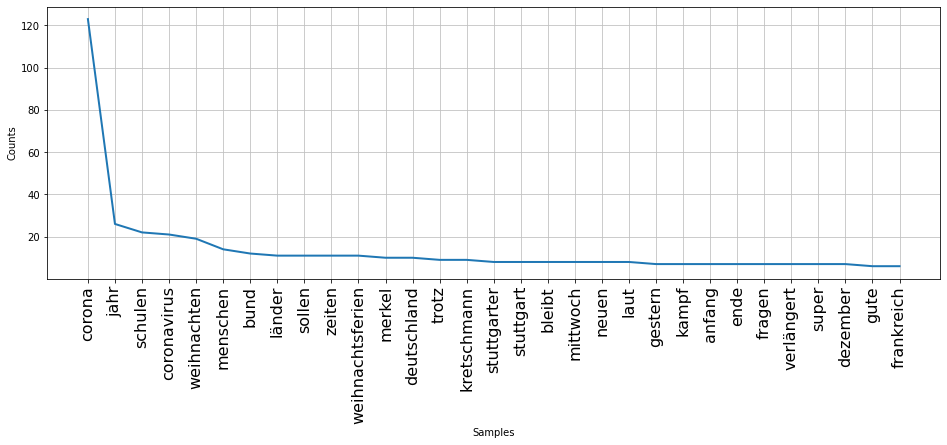

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.xticks(size=16)
freq_dist.plot(31)

In [54]:
tweettext = nltk.Text(filtered_tokens)
tweettext.collocations()

winfried kretschmann; boris palmer; spielen verbreitung; große rolle;
gesamtzahl gestern; angela merkel; blutkonserven heben; feindliche
übernahme; heben medizinisch; kriminelle philanthrop; medizinisch
sinnlose; menschliche zellen; thomas strobl; verlängerung
verschärfung; winzige delle; übernahme zerstört; schüler mental;
verändert schüler; coronavirus gesamtzahl; verbreitung coronavirus


In [155]:
#names = nltk.corpus.names
#namen = [n.lower() for n in names.words('male.txt') or names.words('female.txt')]



In [55]:
namen= []
namen.append('merkel')
namen.append('spahn')
namen.append('kretschmann')
namen.append('drosten')
namen.append('söder')







In [56]:
name_freq = nltk.FreqDist([w for w in filtered_tokens if w in namen])



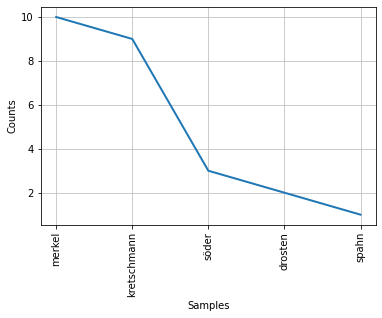

In [57]:
name_freq.plot(8)


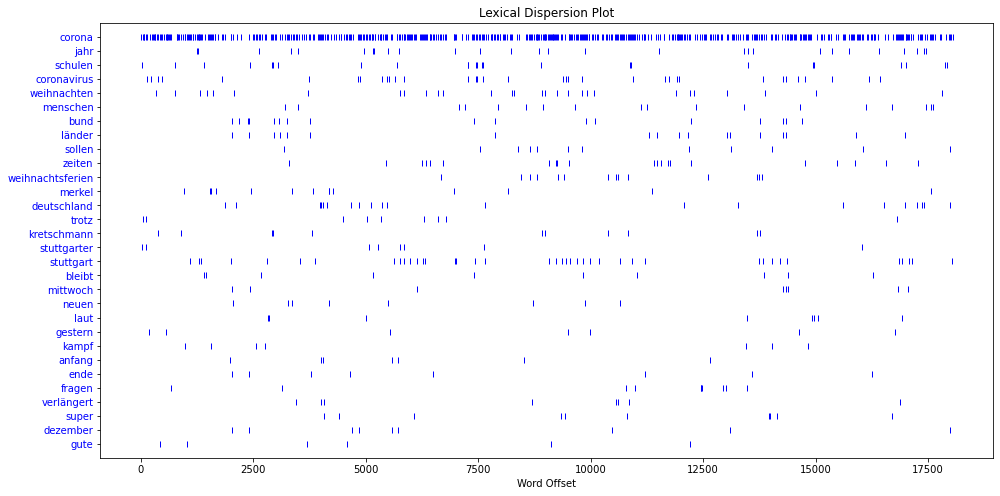

In [58]:
tweettokens = nltk.wordpunct_tokenize(str(sentences))
rawtweettext = nltk.Text(tweettokens)
#rawtweettext.concordance("praktikant")
ld = list(freq_dist)[0:30]
plt.figure(figsize=(16,8))
rawtweettext.dispersion_plot(ld)

In [59]:
#Sentiment with textblob. print simlple sentimentgraph, than aggregeted sentiments over certain time frames

In [60]:
from textblob_de import TextBlobDE as TextBlob 
#from textblob import TextBlob 

def senti(sentence):
   
    blob=TextBlob(sentence)
    vs=blob.sentiment
    return vs

In [61]:
s =0;
ssum=0
slist = []
for i in range(len(df3.index)):
    sentence = df3['text'][i]
 #   print(sentence,senti(sentence))
    s = senti(sentence).polarity
    ssum = ssum +s
    slist.append(s)
df3['Sentiment'] = slist  
print(ssum) 

9.90833333333333


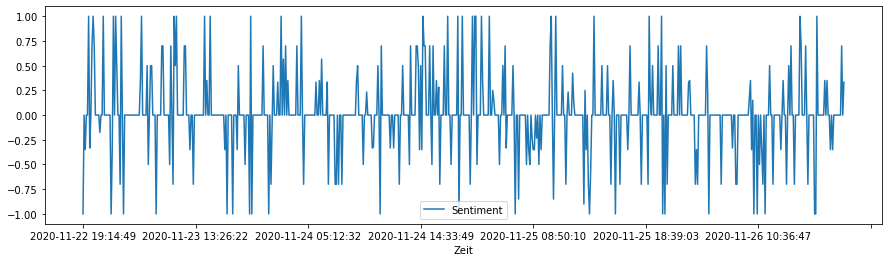

In [62]:
#df.index = pd.to_datetime(df["Date"])

from matplotlib import pyplot
import matplotlib.pylab as plb

df4 = df3.sort_index(ascending=True)

df4.plot( y=["Sentiment"],  figsize=(15,4))



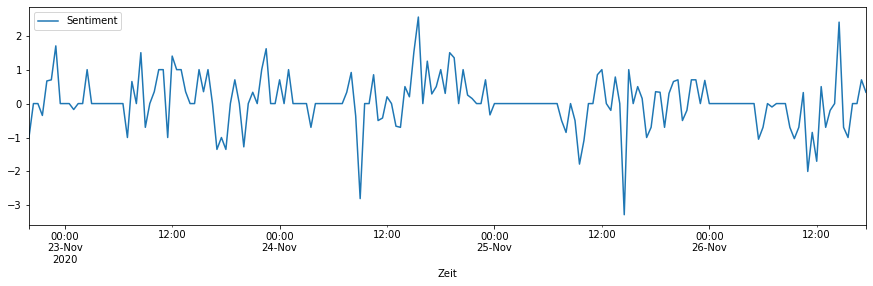

In [63]:
df4.index = pd.to_datetime(df4.index)+ pd.DateOffset(hours=+1)
df5=df4.resample('30T', level=0).sum()
df5.plot( y=["Sentiment"],  figsize=(15,4))